# Prévisions énergétiques Seattle

In [1]:
# Packages import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
# Data loading
raw_data = pd.read_csv(r'C:\Users\Gregoire\Desktop\Projet 4 - Anticipez les besoins en consommation de bâtiments\Data\2016_Building_Energy_Benchmarking.csv', sep = ',', low_memory=False)

In [3]:
# Loading check
raw_data.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [4]:
# Data types exploration
raw_data.dtypes

OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
Address                             object
City                                object
State                               object
ZipCode                            float64
TaxParcelIdentificationNumber       object
CouncilDistrictCode                  int64
Neighborhood                        object
Latitude                           float64
Longitude                          float64
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                       int64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLarge

<AxesSubplot:>

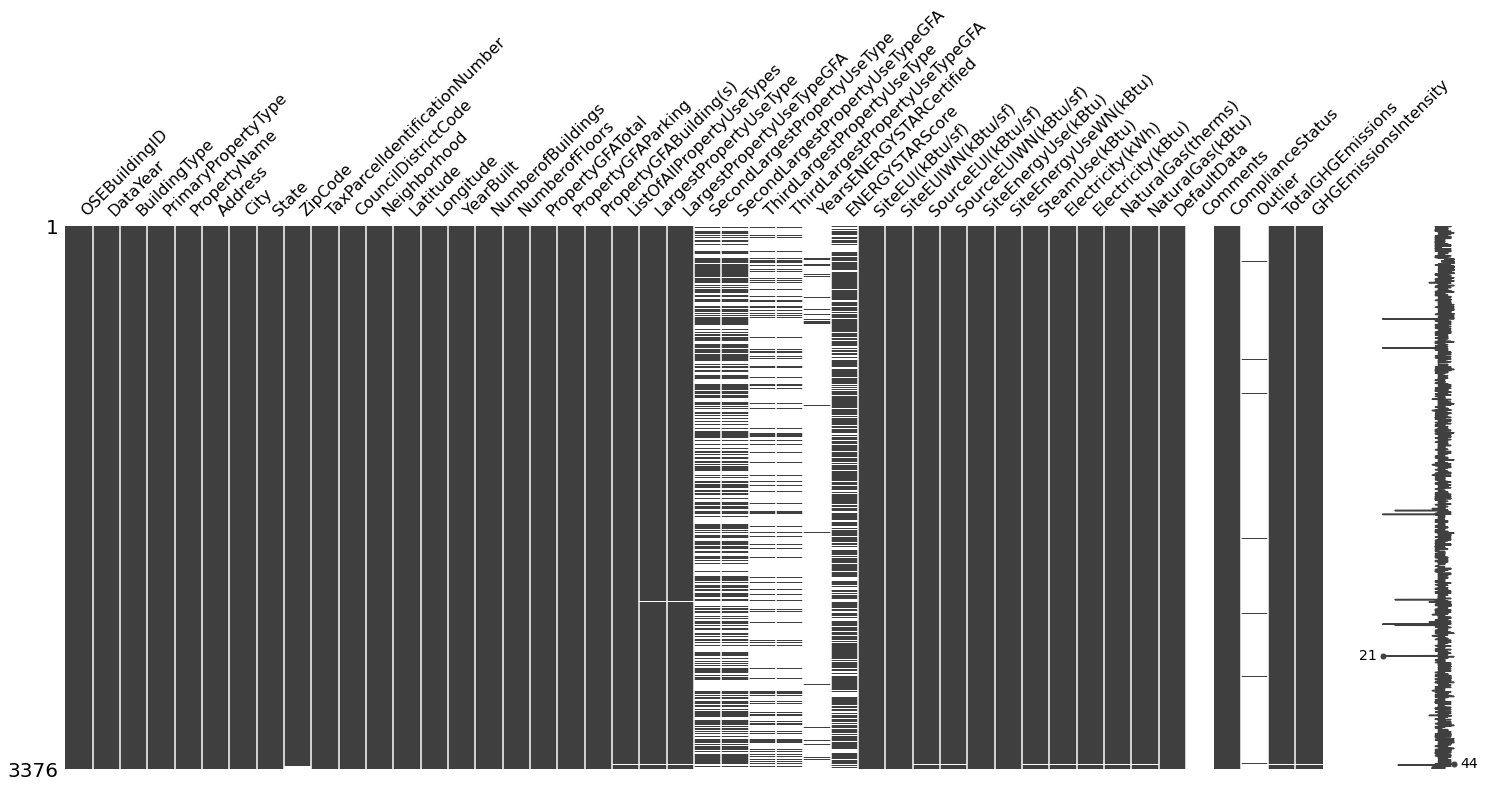

In [5]:
# Missing values check
%matplotlib inline
msno.matrix(raw_data)

The dataset looks quite complete

In [6]:
# Outliers check
raw_data.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,...,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,...,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,...,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,...,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,...,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,...,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,...,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


In [7]:
raw_data[raw_data['Electricity(kWh)'] == raw_data['Electricity(kWh)'].min()]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
3206,49784,2016,NonResidential,Small- and Mid-Sized Office,Bullitt Center,1501 E. Madison St.,Seattle,WA,98122.0,7234600195,...,-33826.80078,-115417.0,0.0,0.0,False,NaN,Compliant,NaN,-0.8,-0.02


### Variable selection

In [8]:
# Non-residential building filtering
non_res_filtered = raw_data[raw_data['BuildingType'] != 'Multifamily MR (5-9)']
non_res_filtered = non_res_filtered[non_res_filtered['BuildingType'] != 'Multifamily LR (1-4)']
non_res_filtered = non_res_filtered[non_res_filtered['BuildingType'] != 'Multifamily HR (10+)']

non_res_filtered.shape

(1668, 46)

Half of the set has been deleted, meaning that half of the buildings where residential ones.

In [9]:
# Filtering-out unused variables
non_res_filtered.drop(
['City',                             
'State',
'TaxParcelIdentificationNumber',
'CouncilDistrictCode',
'YearsENERGYSTARCertified',
'LargestPropertyUseTypeGFA',
'SecondLargestPropertyUseTypeGFA',
'SecondLargestPropertyUseType',
'ThirdLargestPropertyUseTypeGFA',
'ThirdLargestPropertyUseType',
'SiteEUI(kBtu/sf)',
'SourceEUI(kBtu/sf)',
'SiteEnergyUse(kBtu)',
'Electricity(kWh)',
'NaturalGas(therms)',
'Comments'],
axis = 1, inplace = True
)

We know that we are dealing with Seattle (WA) data. Regarding the exact location of the buildings, we already have what we need with Latitude, Longitude and Neighbourhood. The exact descriptions of all activities are of no use for now, so we only keep the LargestPropertyUseType as building's usage indication. 
Most importantly, we want to keep the energy consumptions corrected with the WeatherNormalized attribute. Indeed, if we want to do predictions for future years, and because we don't know the future weather conditions, we want to eliminate the possible abnormal weather conditions in upcoming years. WeatherNormalized measures precisely eliminate these "Hot year" or "Rainy year" effects which impact energy consumptions.
NB: We might want to take into account global warming, but it's a too complex task for the scope of this project.

In [10]:
# Glimpse at what is remaining is the dataset
non_res_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1668 entries, 0 to 3375
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OSEBuildingID              1668 non-null   int64  
 1   DataYear                   1668 non-null   int64  
 2   BuildingType               1668 non-null   object 
 3   PrimaryPropertyType        1668 non-null   object 
 4   PropertyName               1668 non-null   object 
 5   Address                    1668 non-null   object 
 6   ZipCode                    1652 non-null   float64
 7   Neighborhood               1668 non-null   object 
 8   Latitude                   1668 non-null   float64
 9   Longitude                  1668 non-null   float64
 10  YearBuilt                  1668 non-null   int64  
 11  NumberofBuildings          1666 non-null   float64
 12  NumberofFloors             1668 non-null   int64  
 13  PropertyGFATotal           1668 non-null   int64

In [11]:
# Outliers delete
var_filtered = non_res_filtered[non_res_filtered['Outlier'].isnull()]
var_filtered.drop('Outlier', axis = 1, inplace = True) # we don't need this variable anymore

C:\Users\Gregoire\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [12]:
# NaN delete (on our variables of interest)
var_filtered = var_filtered[~(var_filtered['SiteEUIWN(kBtu/sf)'].isnull())]
var_filtered = var_filtered[~(var_filtered['TotalGHGEmissions'].isnull())]
var_filtered = var_filtered[~(var_filtered['GHGEmissionsIntensity'].isnull())]

In [13]:
# Compliance Status verification
#var_filtered[var_filtered['ComplianceStatus'] == ('Error - Correct Default Data' or 'Missing Data' or 'Non-Compliant')]

In [14]:
# Default data <-> compliance?
#var_filtered[var_filtered['DefaultData'] == True]
var_filtered.drop('DefaultData', axis = 1, inplace = True) # for now we delete it

In [15]:
# LargestPropertyUseType & PrimaryPropertyType comparison
var_filtered[['PrimaryPropertyType', 'LargestPropertyUseType']].loc[~(var_filtered['LargestPropertyUseType'] == var_filtered['PrimaryPropertyType'])]

,PrimaryPropertyType,LargestPropertyUseType
5,Other,Police Station
7,Other,Other - Entertainment/Public Assembly
15,Other,Library
16,Other,Fitness Center/Health Club/Gym
18,Mixed Use Property,Social/Meeting Hall
...,...,...
3370,Other,Other - Recreation
3372,Other,Other - Recreation
3373,Other,Other - Recreation
3374,Mixed Use Property,Other - Recreation


LargestPropertyUseType seems to be a better indication of the activity type.
Still, we keep PrimaryPropertyType as possible one-hot encoding source later on.

In [16]:
var_filtered.drop(['BuildingType'], axis = 1, inplace = True)

In [17]:
# List of all building usages
var_filtered['LargestPropertyUseType'].unique()

array(['Hotel', 'Police Station', 'Other - Entertainment/Public Assembly',
       'Library', 'Fitness Center/Health Club/Gym', 'Social/Meeting Hall',
       'Courthouse', 'Other', 'K-12 School', 'College/University',
       'Automobile Dealership', 'Office', 'Self-Storage Facility',
       'Non-Refrigerated Warehouse', 'Other - Mall',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital (General Medical & Surgical)', 'Museum',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Other - Lodging/Residential', 'Residence Hall/Dormitory',
       'Other/Specialty Hospital', 'Financial Office',
       'Distribution Center', 'Parking', 'Multifamily Housing',
       'Worship Facility', 'Restaurant', 'Data Center', 'Laboratory',
       'Supermarket/Grocery Store', 'Convention Center',
       'Urgent Care/Clinic/Other Outpatient', nan, 'Other - Services',
       'Strip Mall', 'Wholesale Club/Supercenter',
       'Refrigerated Warehouse', 'Manufacturing

We have various types of usages, and at least one seems to be residential. We are gonna remove it as well.

In [18]:
# Delete other residential or NaN usage type
var_filtered = var_filtered[~(var_filtered['LargestPropertyUseType'] == 'Multifamily Housing')]
var_filtered = var_filtered[~(var_filtered['LargestPropertyUseType'] == 'nan')]

In [19]:
# Number of building per type
var_filtered.groupby('LargestPropertyUseType')['OSEBuildingID'].count()

LargestPropertyUseType
Adult Education                                           2
Automobile Dealership                                     5
Bank Branch                                               4
College/University                                       24
Convention Center                                         1
Courthouse                                                1
Data Center                                               3
Distribution Center                                      54
Financial Office                                          4
Fire Station                                              1
Fitness Center/Health Club/Gym                            5
Food Service                                              1
Hospital (General Medical & Surgical)                    10
Hotel                                                    75
K-12 School                                             137
Laboratory                                               13
Library          

### Feature engineering

##### Building Age

In [20]:
# Building age
final_set = var_filtered

final_set['BuildingAge'] = 2015 - final_set['YearBuilt']
final_set.drop(['DataYear', 'YearBuilt'], axis = 1, inplace = True)


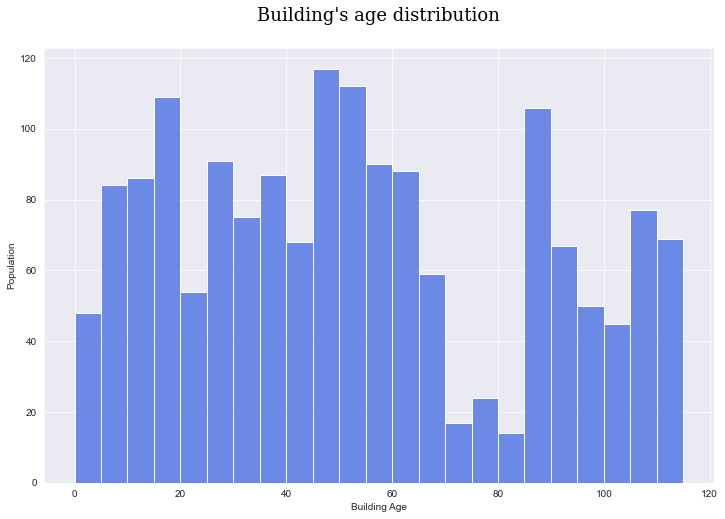

In [21]:
font_perso = {'family': 'serif',
              'color':  'k',
              'size': 18,
             }

fig = plt.figure(figsize=(12,8))
sns.set_style("darkgrid")
ax = sns.histplot(data=final_set, color = 'royalblue', x='BuildingAge', bins=int((final_set.BuildingAge.max() - final_set.BuildingAge.min())/5))
ax.set_xlabel("Building Age")
ax.set_ylabel("Population")
plt.title(f"Building's age distribution\n", fontdict=font_perso)
plt.show()

This calculation and new variable is now able to tell us if older buildings are correlated with higher consumptions/emissions, all things being equal.

##### Energy consumptions per square feet, per age and building's usage

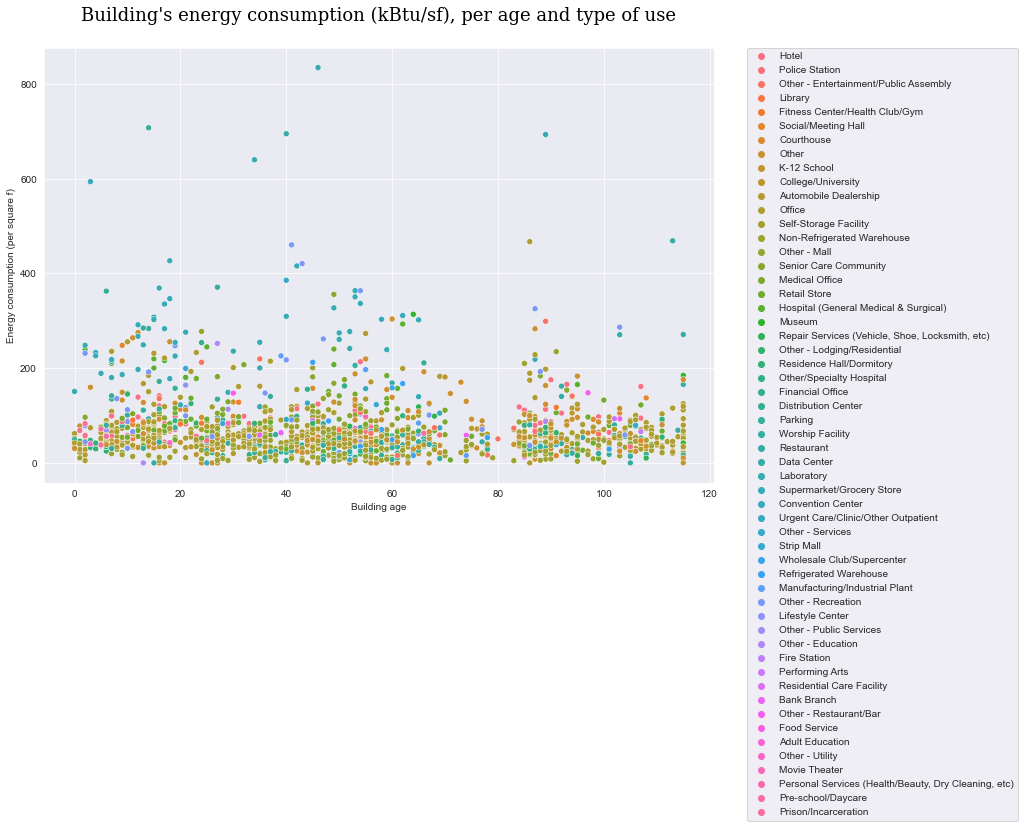

In [22]:
# Older buildings => worse energy management? - Part 1
fig = plt.figure(figsize=(12,8))
sns.set_style("darkgrid")
ax = sns.scatterplot(data=final_set, x='BuildingAge', y='SiteEUIWN(kBtu/sf)', hue='LargestPropertyUseType')
ax.set_xlabel("Building age")
ax.set_ylabel("Energy consumption (per square f)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title(f"Building's energy consumption (kBtu/sf), per age and type of use\n", fontdict=font_perso)
plt.show()


The high number of different usage types makes the plot difficult to interepret. We are going to make the same plot for a reduced number of types, with the PrimaryPropertyType variable.

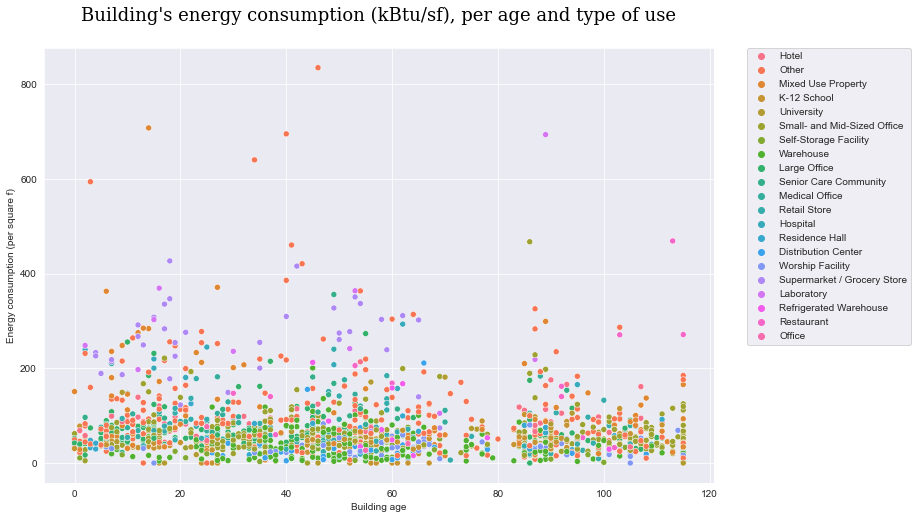

In [23]:
# Older buildings => worse energy management? - Part 2
fig = plt.figure(figsize=(12,8))
sns.set_style("darkgrid")
ax = sns.scatterplot(data=final_set, x='BuildingAge', y='SiteEUIWN(kBtu/sf)', hue='PrimaryPropertyType')
ax.set_xlabel("Building age")
ax.set_ylabel("Energy consumption (per square f)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title(f"Building's energy consumption (kBtu/sf), per age and type of use\n", fontdict=font_perso)
plt.show()

Despite the reduce number of types, we still arent able to see a relationship between these two variables. We are going to do it one last time with a single type of building: K-12 School

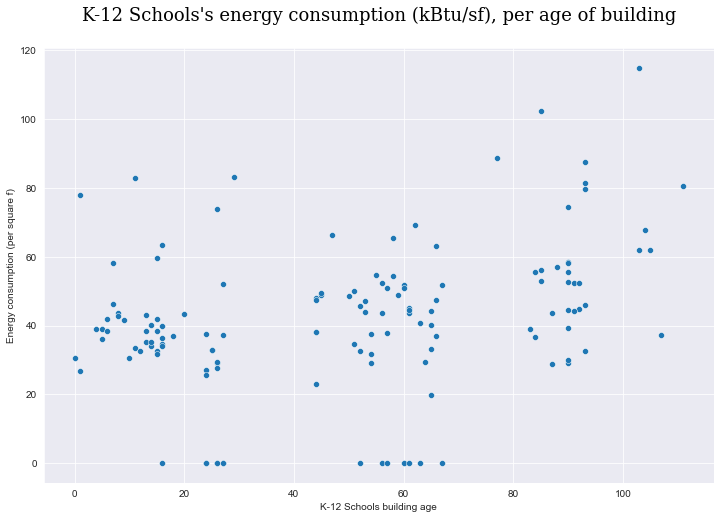

In [24]:
#  Older buildings => worse energy management? - Part 3
K12_set = final_set[final_set['LargestPropertyUseType'] == 'K-12 School']

fig = plt.figure(figsize=(12,8))
sns.set_style("darkgrid")
ax = sns.scatterplot(data=K12_set, x='BuildingAge', y='SiteEUIWN(kBtu/sf)')
ax.set_xlabel("K-12 Schools building age")
ax.set_ylabel("Energy consumption (per square f)")

plt.title(f"K-12 Schools's energy consumption (kBtu/sf), per age of building\n", fontdict=font_perso)
plt.show()

It seems that older building do consume a little more energy than more recent ones, but the effect is very tenuous. We will now take a look at the Greenhouse Gas emissions.

##### GHG Emissions per square feet

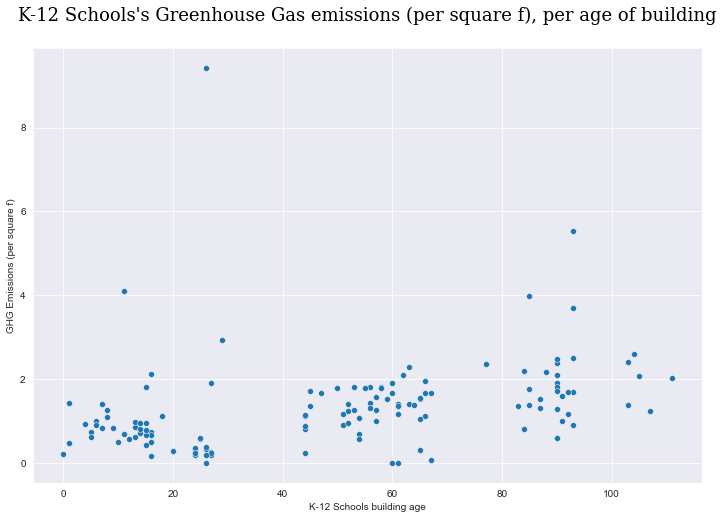

In [25]:
# Older buildings => More GHG emissions?
fig = plt.figure(figsize=(12,8))
sns.set_style("darkgrid")
ax = sns.scatterplot(data=K12_set, x='BuildingAge', y='GHGEmissionsIntensity')
ax.set_xlabel("K-12 Schools building age")
ax.set_ylabel("GHG Emissions (per square f)")

plt.title(f"K-12 Schools's Greenhouse Gas emissions (per square f), per age of building\n", fontdict=font_perso)
plt.show()

With respect to Energy consumption, we see on this graph that there is a slightly positive relationship between the age of a school and the amount of GHG emissions. The older the building, the more it emits.

In our quest of predicting consumption and emissions, building age will definitely be included in the models.

### Correlation heatmap

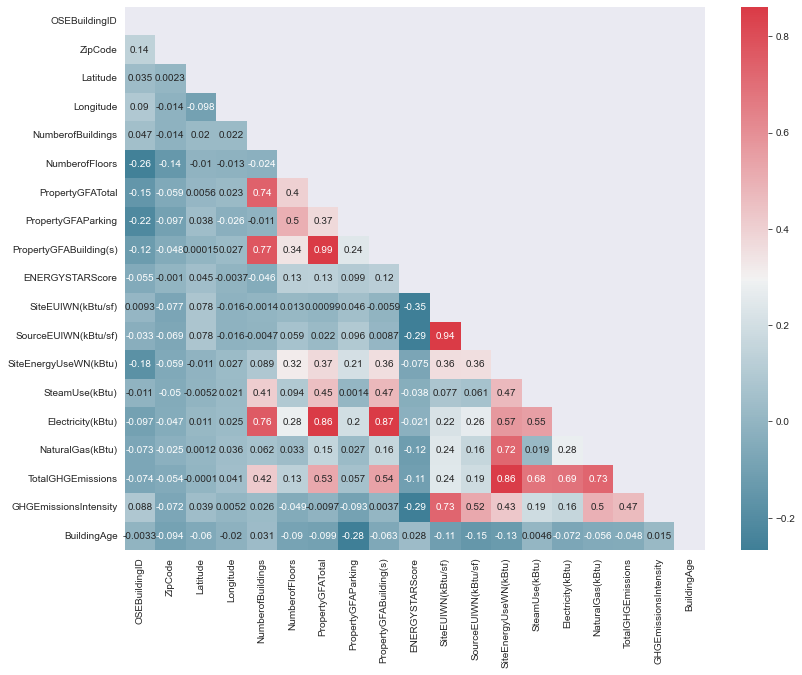

In [26]:
# First correlation heatmap

corr = final_set.corr() # corr calculation
mask = np.triu(np.ones_like(corr, dtype=bool)) # half-correlation table mask
cmap = sns.diverging_palette(225,10, as_cmap=True)
with sns.axes_style("darkgrid"):
    f, ax = plt.subplots(figsize=(13, 10))
    ax = sns.heatmap(corr, mask = mask, cmap = cmap, annot=True, robust = True) # We are running the heatmap on robust quantiles rather than on full set because we don't know about the disributions

There are only few things worth noting.
First, most of the highly correlated figures (for instance Electricity with PropertyGFATotal) are quite obvious: the bigger your building, the more electricity is consumed within it's walls. This will naturally lead us to use only one of those highly correlated variables to prevent colinearity issues.
Second, SourceEUIWN and SiteEUIWN are also very highly correlated. We are going to remove the first one from our analysis.
Last, SteamUse and Electricity are respectively quite and highly correlated with buildings size-related characteristics (as seen in the 1st point) but NaturalGas isn't! This is an interesting result as, to the contrary, NaturalGas is more correlated to SiteEnergyUseWN than Electricity and SteamUse. There is something here to investigate.

In [27]:
# SourceEUIWN delete
final_set.drop('SourceEUIWN(kBtu/sf)', axis = 1, inplace = True)

### Distributions

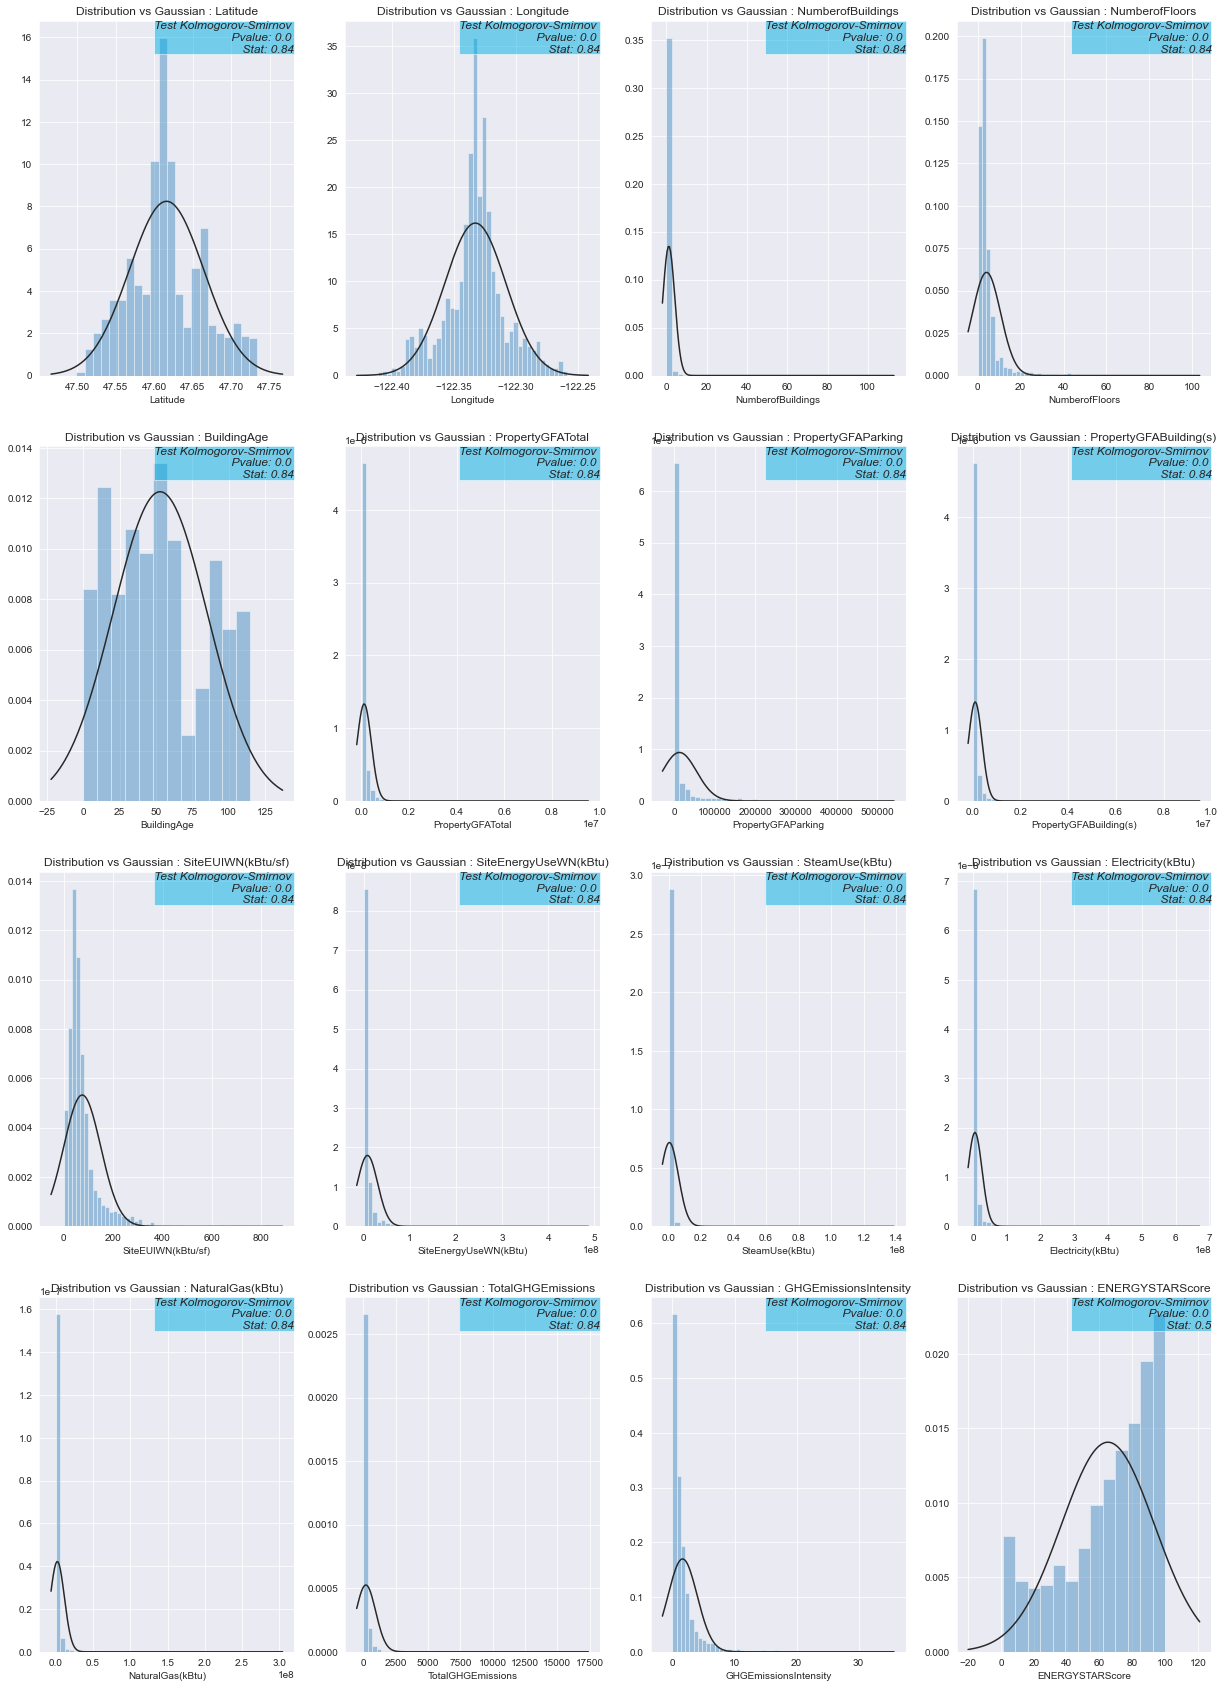

In [28]:
var = ['Latitude','Longitude',
       'NumberofBuildings', 'NumberofFloors', 'BuildingAge',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'SiteEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)','SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 
       'TotalGHGEmissions', 'GHGEmissionsIntensity', 'ENERGYSTARScore'
      ]

import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

sns.set_style("darkgrid")
fig = plt.figure(figsize=(21,30))

sub = 0
for i in range(len(var)): 
    fig.add_subplot(4,4,i+1)
    
    left, width = 0, 1
    bottom, height = 0, 1
    right = left + width
    top = bottom + height
    
    colonne = var[i]
    kol_smi_test = stats.kstest(final_set[colonne].notnull(), 'norm')
    ax = sns.distplot(final_set[colonne], fit=stats.norm, kde=False)
    ax.set_title("Distribution vs Gaussian : {}".format(colonne))
    ax.text(right, top, 'Test Kolmogorov-Smirnov \n Pvalue: {:.2} \n Stat: {:.2}'.format(kol_smi_test.pvalue, kol_smi_test.statistic),
            horizontalalignment='right',
            verticalalignment='top',
            style='italic', transform=ax.transAxes, fontsize = 12,
            bbox={'facecolor':'#00afe6', 'alpha':0.5, 'pad':0})
    sub += 1
plt.show()

We doesn't learn much from the distributions, mostly with this scale. We will try to re-scale the most important ones in order to have a better look.

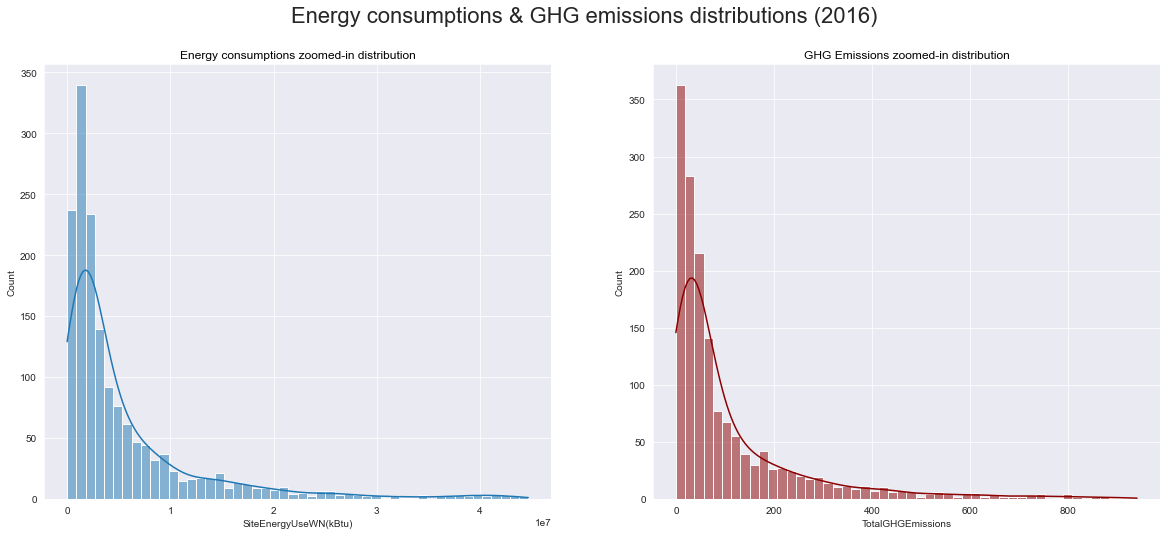

In [29]:
# Energy consumptions and GHG emissions - zoomed-in distributions 
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.set_style("darkgrid")

left, width = 0, 1
bottom, height = 0, 1
right = left + width
top = bottom + height

sns.histplot(data=final_set[(final_set['SiteEnergyUseWN(kBtu)']< (4.5*10**7))], x="SiteEnergyUseWN(kBtu)", kde=True, ax=axes[0], alpha=0.5)
axes[0].set_title("Energy consumptions zoomed-in distribution", color='black')


sns.histplot(data=final_set[(final_set['TotalGHGEmissions']< 1000)], x="TotalGHGEmissions", kde=True, ax=axes[1], color="darkred", alpha=0.5)
axes[1].set_title("GHG Emissions zoomed-in distribution", color='black')

plt.suptitle("Energy consumptions & GHG emissions distributions (2016)", fontsize=22)
plt.show()

We do the same zoom-in for two other important variables: SiteEUIWN and GHGEmissions intensity

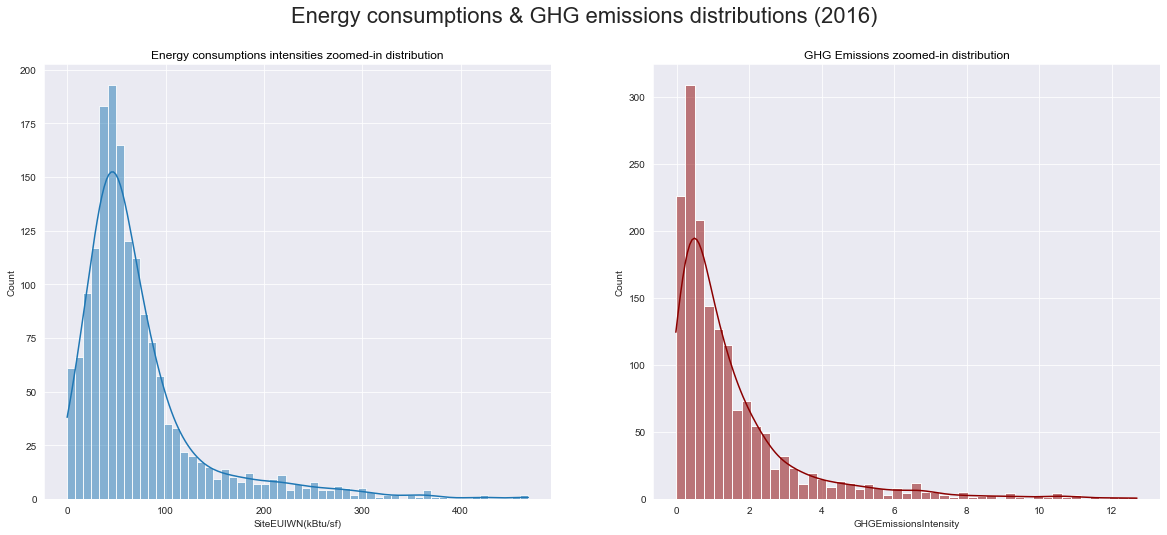

In [30]:
# Energy consumptions and GHG emissions intensities - zoomed-in distributions 

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.set_style("darkgrid")

left, width = 0, 1
bottom, height = 0, 1
right = left + width
top = bottom + height

sns.histplot(data=final_set[(final_set['SiteEUIWN(kBtu/sf)']< 500)], x="SiteEUIWN(kBtu/sf)", kde=True, ax=axes[0], alpha=0.5)
axes[0].set_title("Energy consumptions intensities zoomed-in distribution", color='black')


sns.histplot(data=final_set[(final_set['GHGEmissionsIntensity']< 13)], x="GHGEmissionsIntensity", kde=True, ax=axes[1], color="darkred", alpha=0.5)
axes[1].set_title("GHG Emissions zoomed-in distribution", color='black')

plt.suptitle("Energy consumptions & GHG emissions distributions (2016)", fontsize=22)
plt.show()

Looking at the same series but this time divided by the area ot the building, the distributions are a little bit shifted to the right, mostly the energy consumptions.
I may traduce a distinction between energy-saving buildings and inefficient ones or business activity types.

We are going to test this activity-type vs consumption hypothesis.

### Consumptions and emissions vs type of activity/building usage 

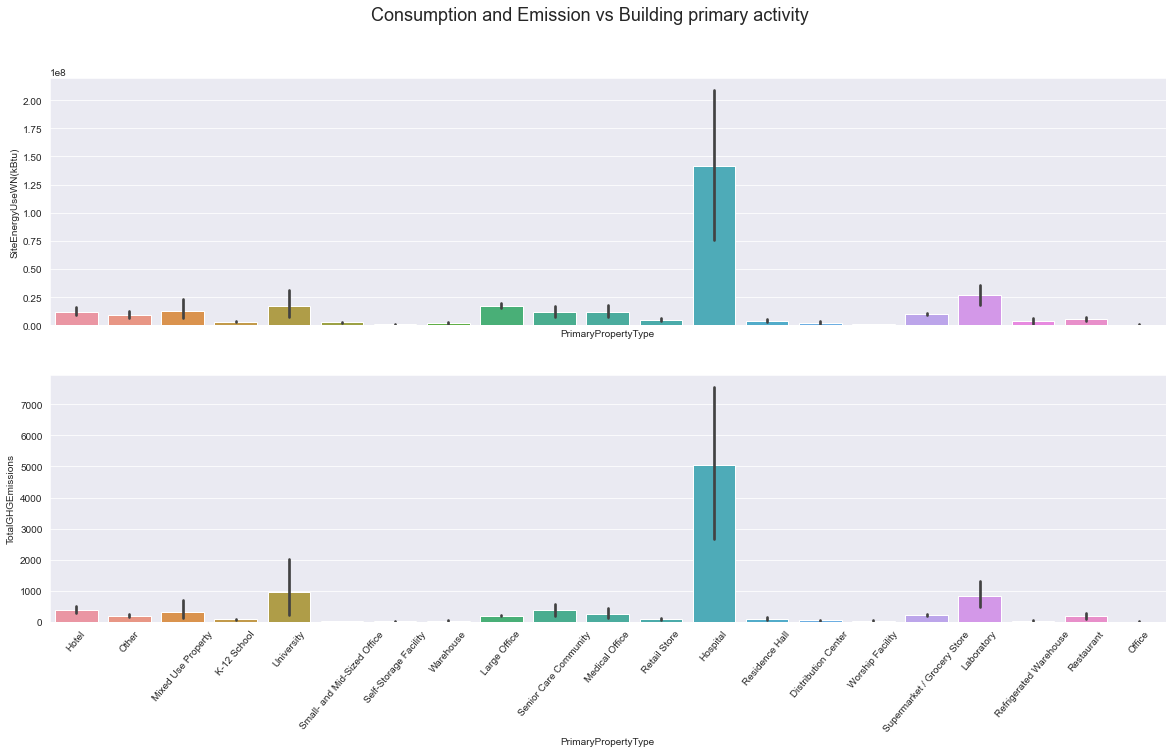

In [31]:
# Barplot of consumptions according to building activity

fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=False, figsize=(20,10))
sns.barplot(x='PrimaryPropertyType',y='SiteEnergyUseWN(kBtu)',data=final_set, ax=axes[0])
sns.barplot(x='PrimaryPropertyType',y='TotalGHGEmissions',data=final_set, ax=axes[1])
plt.xticks(rotation=50)
plt.suptitle("Consumption and Emission vs Building primary activity", fontsize=18)
plt.show()

It is quite interesting to see that consumptions and emissions are very much correlated, except for Large Offices.
Hospital is by far the most energy-intense and polluting type of building, with University and Laboratory completing the podium, far behind.

We could now take a look at how much ground floor area has an impact on consumptions and emissions.

### Consumptions and emissions vs building size

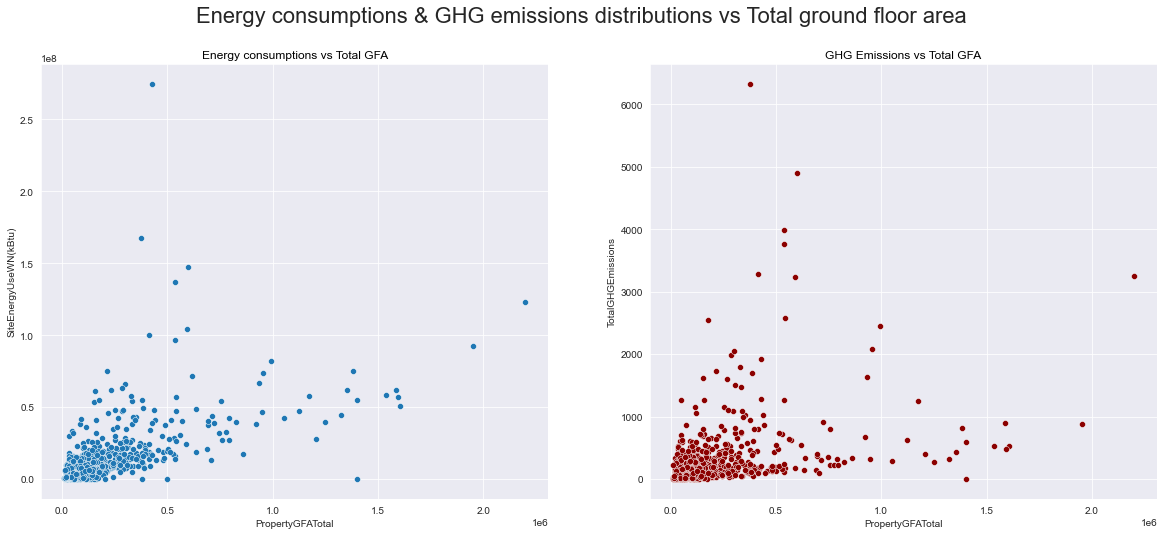

In [32]:
# Energy consumptions and GHG emissions vs Size of the building
restricted_set = final_set[final_set['PropertyGFATotal']<4*10**6]                   # On the next three lines... 
restricted_set2 = restricted_set[restricted_set['SiteEnergyUseWN(kBtu)']<3.2*10**8] #...we filter-out very high values...
restricted_set3 = restricted_set2[restricted_set2['TotalGHGEmissions'] < 8000]      #...so our graphs are more readable

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.set_style("darkgrid")

left, width = 0, 1
bottom, height = 0, 1
right = left + width
top = bottom + height

sns.scatterplot(data=restricted_set3, x='PropertyGFATotal', y='SiteEnergyUseWN(kBtu)', ax=axes[0])
axes[0].set_title("Energy consumptions vs Total GFA", color='black')


sns.scatterplot(data=restricted_set3, x='PropertyGFATotal', y='TotalGHGEmissions', ax=axes[1], color="darkred")
axes[1].set_title("GHG Emissions vs Total GFA", color='black')

plt.suptitle("Energy consumptions & GHG emissions distributions vs Total ground floor area", fontsize=22)

plt.show()

Without surprise, we see a positive relationship between ground floor area and consumptions/emissions, although it is clearer with energy consumption. 
Total ground floor area will for sure be an impactful parameter in predicting future emissions and consumptions.

### Map of Seattle with our buildings

For the sake of beauty, here is a Seattle map with the projection of our buildings!

In [34]:
# Map of Seattle
import folium
import folium.plugins

# Seattle center coordinates
seattle_lat = 47.6062
seattle_lon = -122.3321

seattle_map = folium.Map(location=[seattle_lat, seattle_lon], zoom_start=11)

#Clusters
marker_cluster = folium.plugins.MarkerCluster().add_to(seattle_map)
for lat, lng, in zip(final_set.Latitude, final_set.Longitude):
    folium.Marker(location=[lat, lng]).add_to(marker_cluster)

seattle_map

Finally, we export this cleaned dataset into a csv file that will be used for predictions in another notebook.

In [35]:
# CSV export
final_set.to_csv('./Data/seattle_cleaned_dataset.csv')